# Big Data

### Prowadzący, modyfikacje i aktualizacja: dr Marcin Szmydt

Opracowanie pierwotne: mgr inż. Dominik Filipiak
Notebook do zdalnej pracy ze Sparkiem.

### Przygotowanie sparka do pracy z colabem

Przed przystąpieniem do pracy musimy uruchomić poniższe komórki.
W razie kłopotów sprawdźcie czy nie zmieniła się wersja tutaj: http://www.apache.org/dist/spark/. W razie czego trzeba pozmieniać numerki wszędzie (np. 3.4.1 na 3.5.1).

Tu ściągamy Javę oraz Sparka razem z Hadoopem, a także instalujemy pakiet findspark w pythonie. Pewnie już się domyślacie, że przez wykrzyknik można wywołać linuksowe polecenia w Colabie.



In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null # polecenie linuxowe, które instaluje bibliotekę javy
!wget -q http://www.apache.org/dist/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz #pobieranie pliku z parametrem q (quiet - nie wyświetla pliku)
!tar xf spark-3.5.1-bin-hadoop3.tgz
!pip install -q findspark==1.3.0 # instalacja biblioteki find_spark

Instalujemy pyspark w Pythonie

In [2]:
!pip install -q pyspark==3.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Tu ustalamy zmienne środowiskowe.

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

Jesteśmy gotowi do odpalenia Sparka - tworzymy sesję i kontekst.

In [3]:
import findspark
import pyspark
from pyspark.sql import SparkSession
from pyspark import SparkContext

findspark.init("spark-3.5.1-bin-hadoop3")
sc = pyspark.SparkContext('local[*]')
spark = SparkSession.builder.appName('abc').getOrCreate()

In [4]:
!free -mh # Komenda na sprawdzenie dostępnej pamięci RAM

               total        used        free      shared  buff/cache   available
Mem:            12Gi       1.1Gi       1.0Gi       2.0Mi        10Gi        11Gi
Swap:             0B          0B          0B


# Możemy przystąpić do pracy!

In [ ]:
sc.parallelize([1,2,3]).map(lambda x: x + 1).collect()

[2, 3, 4]

# Zajęcia 25.03.2024

In [ ]:
sc #obiekt SpartContext - potrzebny żeby pracować na RDD

<SparkContext master=local[*] appName=pyspark-shell>

###Przechodzenie między środowiskiem lokalnym (Python) a środowiskiem rozproszonym (Spark)

In [ ]:
lista = [1, 2, 3] #lista pythonowa

In [ ]:
type(lista)

list

In [ ]:
distributed_list = sc.parallelize(lista) # sc.parallelize(lista) - przejście z lokalnej zmiennej do RDD, które jest rozproszone w środowisku naszego clustra

In [ ]:
type(distributed_list)

pyspark.rdd.RDD

In [ ]:
distributed_list.take(10) # weź pierwszych 10 elementów z listy

[1, 2, 3]

In [ ]:
listapython = distributed_list.map(lambda x: x + 1).collect() # wywołując collect() powracamy ze środowiska rozproszonego do lokalnego

In [ ]:
listapython

[2, 3, 4]

In [ ]:
type(listapython)

list

Wyjaśnienie działania funkcji lambda:

In [ ]:
def funkcja1(x):
  return x+1

# taka definicja funkcji ma sens, gdy jes wykorzystywana w wielu miejscach

In [ ]:
funkcja1(1)

2

In [ ]:
funkcja2 = lambda x: x + 1 # działanie funkcji tożsame z funkcja1. Różnica polega tylko na sposobie zapisu

In [ ]:
funkcja2(1)

2

In [ ]:
funkcja3 = lambda x: x * 3

In [ ]:
funkcja3(5)

15

###RDD -Wczytywanie plików, podstawowe operacje (take, map, filter)

Pobranie pliku csv i załadowanie do środowiska sparkowego

In [ ]:
!head -5 baby.csv

Year,First Name,County,Sex,Count
2013,DAVID,KINGS,M,272
2013,JAYDEN,KINGS,M,268
2013,JAYDEN,QUEENS,M,219
2013,MOSHE,KINGS,M,219


In [ ]:
baby_names = sc.textFile('baby.csv') #zmiana na plik tekstowy

In [ ]:
baby_names.take(10)

['Year,First Name,County,Sex,Count',
 '2013,DAVID,KINGS,M,272',
 '2013,JAYDEN,KINGS,M,268',
 '2013,JAYDEN,QUEENS,M,219',
 '2013,MOSHE,KINGS,M,219',
 '2013,ETHAN,QUEENS,M,216',
 '2013,SOPHIA,QUEENS,F,204',
 '2013,DANIEL,QUEENS,M,203',
 '2013,JACOB,KINGS,M,202',
 '2013,ESTHER,KINGS,F,196']

In [ ]:
rows = baby_names.map(lambda x: x.split(',')) # w każdym wierzu zostanie zaaplikowana funkcja, która rozdziela elementy po przecinku

In [ ]:
rows.take(3)

[['Year', 'First Name', 'County', 'Sex', 'Count'],
 ['2013', 'DAVID', 'KINGS', 'M', '272'],
 ['2013', 'JAYDEN', 'KINGS', 'M', '268']]

In [ ]:
rows.filter(lambda x: 'Year' not in x).take(5) # filtrowanie - wiersze mające 'Year' nie zostaną wyświetlone

[['2013', 'DAVID', 'KINGS', 'M', '272'],
 ['2013', 'JAYDEN', 'KINGS', 'M', '268'],
 ['2013', 'JAYDEN', 'QUEENS', 'M', '219'],
 ['2013', 'MOSHE', 'KINGS', 'M', '219'],
 ['2013', 'ETHAN', 'QUEENS', 'M', '216']]

###Zadanie 1 - Jak odfiltrować z RDD imiona, które mają mniej niż 250 wystąpień (count)

In [ ]:
#kod
(rows.filter(lambda x: 'Year' not in x)
     .filter(lambda x: int(x[4])<250).take(10))

[['2013', 'JAYDEN', 'QUEENS', 'M', '219'],
 ['2013', 'MOSHE', 'KINGS', 'M', '219'],
 ['2013', 'ETHAN', 'QUEENS', 'M', '216'],
 ['2013', 'SOPHIA', 'QUEENS', 'F', '204'],
 ['2013', 'DANIEL', 'QUEENS', 'M', '203'],
 ['2013', 'JACOB', 'KINGS', 'M', '202'],
 ['2013', 'ESTHER', 'KINGS', 'F', '196'],
 ['2013', 'ETHAN', 'KINGS', 'M', '196'],
 ['2013', 'ISABELLA', 'QUEENS', 'F', '192'],
 ['2013', 'DANIEL', 'KINGS', 'M', '188']]

###Cache (i wpływ na czas przetarzania)

In [ ]:
nums = sc.parallelize(range(1, 1000001))

In [ ]:
nums.count()

1000000

In [ ]:
# ile jest liczb pierwszych od 1 do 1000000
def isPrime(n) :

    # Corner cases
    if (n <= 1) :
        return False
    if (n <= 3) :
        return True

    # This is checked so that we can skip
    # middle five numbers in below loop
    if (n % 2 == 0 or n % 3 == 0) :
        return False

    i = 5
    while(i * i <= n) :
        if (n % i == 0 or n % (i + 2) == 0) :
            return False
        i = i + 6

    return True

In [ ]:
isPrime(11)

True

In [ ]:
primes = nums.filter(isPrime) # filtrowanie jest transformacją (nie wykonuje obliczeń)

In [ ]:
primes.count() # zliczanie jest akcją

78498

In [ ]:
import time

In [ ]:
zmiennax = 'testx'

print("Moja zmienna to: " + zmiennax)

print(f"Moja zmienna to: {zmiennax}") #lepsze, bezpieczniejsze rozwiązanie na umieszczenie zmiennej w princie

Moja zmienna to: testx
Moja zmienna to: testx


In [ ]:
start = time.time()
print(f'Jest {primes.count()} liczb pierwszych w milionie')
end = time.time()
print(f'Upłynęło {end-start} sekund')

# bez cache

Jest 78498 liczb pierwszych w milionie
Upłynęło 3.345008611679077 sekund


In [ ]:
primes.cache()

PythonRDD[4] at RDD at PythonRDD.scala:53

In [ ]:
start = time.time()
print(f'Jest {primes.count()} liczb pierwszych w milionie')
end = time.time()
print(f'Upłynęło {end-start} sekund')

# z cache prawie 6 sekund, ponieważ za pierwszym razem musi się uruchomić cache

Jest 78498 liczb pierwszych w milionie
Upłynęło 5.05813193321228 sekund


In [ ]:
start = time.time()
print(f'Jest {primes.count()} liczb pierwszych w milionie')
end = time.time()
print(f'Upłynęło {end-start} sekund')

# po ponownym uruchomieniu kodu cache jest już aktywny i czas zmniejsza się kilkukrotnie

Jest 78498 liczb pierwszych w milionie
Upłynęło 1.0205965042114258 sekund


In [ ]:
start = time.time()
print(f'Jest {primes.count()} liczb pierwszych w milionie')
end = time.time()
print(f'Upłynęło {end-start} sekund')

Jest 78498 liczb pierwszych w milionie
Upłynęło 0.4208979606628418 sekund


In [ ]:
primes.unpersist() #metoda unpersist usuwa zbiór z pamięci podręcznej

PythonRDD[4] at RDD at PythonRDD.scala:53

In [ ]:
# po usunięciu zbioru RDD ponownie wydłużył się czas działania kodu
start = time.time()
print(f'Jest {primes.count()} liczb pierwszych w milionie')
end = time.time()
print(f'Upłynęło {end-start} sekund')

Jest 78498 liczb pierwszych w milionie
Upłynęło 3.2949860095977783 sekund


###Sampling (losowanie podzbioru danych)

In [ ]:
# Spark nie jest dobry przy przetwaraniu małych zbiorów danych
one_to_ten = range(1,11)
parallel = sc.parallelize(one_to_ten)

In [ ]:
parallel.take(100)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
# ?parallel.sample - opis funkcji/pomoc

In [ ]:
parallel.sample(True, .2).take(5) # True - ze zwracaniem, .2 - losujemy 20%

# This is not guaranteed to provide exactly the fraction specified of the total
#count of the given :class:`DataFrame`.

[1, 7, 10]

In [ ]:
parallel.takeSample(True, 2) # takeSample gwarantuje, że zawsze wylosujemy 20% (pozbywamy się marginesu błędu na małych zbiorach)

[4, 8]

In [ ]:
parallel_big = sc.parallelize(range(1,100001))

In [ ]:
parallel_big.sample(True, .2).count()

20021

In [ ]:
parallel_big.sample(True, .2, 5345).take(5) #ziarno (5345 - może byc dowolną liczbą) - gwarantuje wylosowanie zawsze tego samego podzbioru

[16, 27, 30, 34, 36]

###Intersection, Union, Joins

In [ ]:
one = sc.parallelize(range(1,10))
two = sc.parallelize(range(5,15))

In [ ]:
one.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
two.collect()

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [ ]:
one.intersection(two).collect() #część wspólna

[8, 5, 9, 6, 7]

In [ ]:
one.union(two).collect() # suma z powtórzeniami

[1, 2, 3, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [ ]:
one.union(two).distinct().collect() #distinct - gwarantuje unikalne wartości/elementy

[4, 8, 12, 1, 5, 9, 13, 2, 6, 10, 14, 3, 7, 11]

In [ ]:
names1 = sc.parallelize(('abe', 'abby', 'apple')).map(lambda x: (x, 1))
names2 = sc.parallelize(('apple', 'beatty', 'beatrice')).map(lambda x: (x, 5))
print(f'names1: {names1.collect()}')
print(f'names2: {names2.collect()}')

# listy krotek - klucz, wartość

names1: [('abe', 1), ('abby', 1), ('apple', 1)]
names2: [('apple', 5), ('beatty', 5), ('beatrice', 5)]


In [ ]:
names1.join(names2).collect() # przy zwykłym joinie łączą się elementy, które mają ten sam klucz

[('apple', (1, 5))]

In [ ]:
names1.leftOuterJoin(names2).collect() #wszystkie z lewej

[('abby', (1, None)), ('abe', (1, None)), ('apple', (1, 5))]

In [ ]:
names1.rightOuterJoin(names2).collect() #wszystkie z prawej

[('beatty', (None, 5)), ('beatrice', (None, 5)), ('apple', (1, 5))]

In [ ]:
names1.cartesian(names2).collect() #iloczyn kartezjański

[(('abe', 1), ('apple', 5)),
 (('abe', 1), ('beatty', 5)),
 (('abe', 1), ('beatrice', 5)),
 (('abby', 1), ('apple', 5)),
 (('apple', 1), ('apple', 5)),
 (('abby', 1), ('beatty', 5)),
 (('abby', 1), ('beatrice', 5)),
 (('apple', 1), ('beatty', 5)),
 (('apple', 1), ('beatrice', 5))]

###Zapis do jednego pliku (użycie coalesce)

In [ ]:
wynik = names1.cartesian(names2)

In [ ]:
type(wynik)

pyspark.rdd.RDD

In [ ]:
wynik.saveAsTextFile('wynik.txt')
#stworzenie katalogu z 4 plikami part (ponieważ maszyna ma 4 rdzenie i może prowadzić rozproszone obliczenia)

In [ ]:
!cat wynik.txt/part-00000

(('abe', 1), ('apple', 5))


In [ ]:
wynik.coalesce(1).saveAsTextFile('wynik_one_partition.txt')

In [ ]:
!cat wynik_one_partition.txt/part-00000

(('abe', 1), ('apple', 5))
(('abe', 1), ('beatty', 5))
(('abe', 1), ('beatrice', 5))
(('abby', 1), ('apple', 5))
(('apple', 1), ('apple', 5))
(('abby', 1), ('beatty', 5))
(('abby', 1), ('beatrice', 5))
(('apple', 1), ('beatty', 5))
(('apple', 1), ('beatrice', 5))


###Zadanie 2
1. Stwórz zmienną w rozproszonym środowisku Sparka (RDD), która zawiera liczby od jeden do miliona
2. Usuń z tej zmiennej liczby, które mają resztę z dzielenia przez 5 mniejszą niż 2
3. Wylosuj 1% rekordów z uzyskanego RDD bez zwracania z ziarnem losowości 12345
4. Zapisz na lokalnym systemie plików do jednego pliku tekstowego
5. Odczytaj pierwsze 3 liczby z zapisanego pliku

In [ ]:
#kod
# 1 Stwórz zmienną w rozproszonym środowisku Sparka (RDD), która zawiera liczby od jeden do miliona
milion = sc.parallelize(range(1, 1000001))

In [ ]:
#2 Usuń z tej zmiennej liczby, które mają resztę z dzielenia przez 5 mniejszą niż 2

milion_filtered = milion.filter(lambda x: x % 5 >= 2)

In [ ]:
milion_filtered.take(10)

[2, 3, 4, 7, 8, 9, 12, 13, 14, 17]

In [ ]:
# 3 Wylosuj 1% rekordów z uzyskanego RDD bez zwracania z ziarnem losowości 12345

probka = milion_filtered.sample(False, .01, 12345)

In [ ]:
# 4 Zapisz na lokalnym systemie plików do jednego pliku tekstowego

probka.saveAsTextFile('probka_zad2.txt')

In [ ]:
probka.coalesce(1).saveAsTextFile('probka_one_partition.txt')

In [ ]:
# 5 Odczytaj pierwsze 3 liczby z zapisanego pliku

!head -3 probka_one_partition.txt/part-00000 # Wynik jest poprawny

34
79
233


###groupByKey

In [ ]:
!head -5 baby.csv

Year,First Name,County,Sex,Count
2013,DAVID,KINGS,M,272
2013,JAYDEN,KINGS,M,268
2013,JAYDEN,QUEENS,M,219
2013,MOSHE,KINGS,M,219


In [ ]:
baby_names = sc.textFile('baby.csv')

In [ ]:
baby_names_no_header = baby_names.filter(lambda x: x!='Year,First Name,County,Sex,Count')

In [ ]:
baby_names_no_header.take(10)

['2013,DAVID,KINGS,M,272',
 '2013,JAYDEN,KINGS,M,268',
 '2013,JAYDEN,QUEENS,M,219',
 '2013,MOSHE,KINGS,M,219',
 '2013,ETHAN,QUEENS,M,216',
 '2013,SOPHIA,QUEENS,F,204',
 '2013,DANIEL,QUEENS,M,203',
 '2013,JACOB,KINGS,M,202',
 '2013,ESTHER,KINGS,F,196',
 '2013,ETHAN,KINGS,M,196']

In [ ]:
rows = baby_names_no_header.map(lambda x: x.split(','))

In [ ]:
rows.take(10)

[['2013', 'DAVID', 'KINGS', 'M', '272'],
 ['2013', 'JAYDEN', 'KINGS', 'M', '268'],
 ['2013', 'JAYDEN', 'QUEENS', 'M', '219'],
 ['2013', 'MOSHE', 'KINGS', 'M', '219'],
 ['2013', 'ETHAN', 'QUEENS', 'M', '216'],
 ['2013', 'SOPHIA', 'QUEENS', 'F', '204'],
 ['2013', 'DANIEL', 'QUEENS', 'M', '203'],
 ['2013', 'JACOB', 'KINGS', 'M', '202'],
 ['2013', 'ESTHER', 'KINGS', 'F', '196'],
 ['2013', 'ETHAN', 'KINGS', 'M', '196']]

In [ ]:
#W jakich hrabstwach występuje dane imię

In [ ]:
(rows
 .map(lambda x: (x[1], x[2]))
 .groupByKey()
 .map(lambda x: {x[0]: list(x[1])})
 ).collect()

[{'JAYDEN': ['KINGS', 'QUEENS']},
 {'ETHAN': ['QUEENS', 'KINGS']},
 {'SOPHIA': ['QUEENS']},
 {'DANIEL': ['QUEENS', 'KINGS']},
 {'ESTHER': ['KINGS']},
 {'ISABELLA': ['QUEENS']},
 {'AIDEN': ['KINGS']},
 {'NOAH': ['KINGS']},
 {'JOSEPH': ['KINGS']},
 {'DAVID': ['KINGS']},
 {'MOSHE': ['KINGS']},
 {'JACOB': ['KINGS', 'QUEENS']},
 {'LEAH': ['KINGS']},
 {'MATTHEW': ['QUEENS']}]

###reduceByKey

In [ ]:
rows.take(20)

[['2013', 'DAVID', 'KINGS', 'M', '272'],
 ['2013', 'JAYDEN', 'KINGS', 'M', '268'],
 ['2013', 'JAYDEN', 'QUEENS', 'M', '219'],
 ['2013', 'MOSHE', 'KINGS', 'M', '219'],
 ['2013', 'ETHAN', 'QUEENS', 'M', '216'],
 ['2013', 'SOPHIA', 'QUEENS', 'F', '204'],
 ['2013', 'DANIEL', 'QUEENS', 'M', '203'],
 ['2013', 'JACOB', 'KINGS', 'M', '202'],
 ['2013', 'ESTHER', 'KINGS', 'F', '196'],
 ['2013', 'ETHAN', 'KINGS', 'M', '196'],
 ['2013', 'ISABELLA', 'QUEENS', 'F', '192'],
 ['2013', 'DANIEL', 'KINGS', 'M', '188'],
 ['2013', 'JACOB', 'QUEENS', 'M', '186'],
 ['2013', 'AIDEN', 'KINGS', 'M', '182'],
 ['2013', 'LEAH', 'KINGS', 'F', '179'],
 ['2013', 'NOAH', 'KINGS', 'M', '168'],
 ['2013', 'JOSEPH', 'KINGS', 'M', '166'],
 ['2013', 'MATTHEW', 'QUEENS', 'M', '161']]

In [ ]:
#Ile razy dane imię wystąpiło we wszystkich hrabstwach

In [ ]:
#?rows.reduceByKey()

In [ ]:
(rows
 .map(lambda x: (x[1],int(x[4])))
 .reduceByKey(lambda x,y: x+y)
).collect()

# ważne żeby funkcja redukująca była przemienna (dodawanie, mnożenie)

[('JAYDEN', 487),
 ('ETHAN', 412),
 ('SOPHIA', 204),
 ('DANIEL', 391),
 ('ESTHER', 196),
 ('ISABELLA', 192),
 ('AIDEN', 182),
 ('NOAH', 168),
 ('JOSEPH', 166),
 ('DAVID', 272),
 ('MOSHE', 219),
 ('JACOB', 388),
 ('LEAH', 179),
 ('MATTHEW', 161)]

###Reduce + flatMap

In [ ]:
x1 = sc.parallelize(['kot','pies','zajac', 'niedzwiedz'])
x2 = sc.parallelize(['wilk','pies','dzik', 'bocian'])

In [ ]:
x1.reduce(lambda x,y: x + '_' + y)

'kot_pies_zajac_niedzwiedz'

In [ ]:
#łączna liczba znaków we wszystkich wyrazach w x1

In [ ]:
(x1
 .map(lambda x: [x, len(x)])
 .map(lambda x: [x[1]])
 #.flatMap(lambda x: [x[1]])
).take(10)

# lista, w której są mniejsze listy (jeżeli używamy map)
# w przypadku użycia flatmap "redukujemy" jeden wymiar - w tym przypadku zostają nam wartości w liście

[[3], [4], [5], [10]]

In [ ]:
(x1
 .map(lambda x: [x, len(x)])
 .flatMap(lambda x: [x[1]])
).reduce(lambda x, y: x + y)

22

# Zajęcia 12.04.2023

###CountByKey

In [ ]:
x12 = x1.union(x2)
x12.take(10)

['kot', 'pies', 'zajac', 'niedzwiedz', 'wilk', 'pies', 'dzik', 'bocian']

In [ ]:
(x12
 .map(lambda x: (x, 'wartosc-wymagane-pole'))
 ).collect()

[('kot', 'wartosc-wymagane-pole'),
 ('pies', 'wartosc-wymagane-pole'),
 ('zajac', 'wartosc-wymagane-pole'),
 ('niedzwiedz', 'wartosc-wymagane-pole'),
 ('wilk', 'wartosc-wymagane-pole'),
 ('pies', 'wartosc-wymagane-pole'),
 ('dzik', 'wartosc-wymagane-pole'),
 ('bocian', 'wartosc-wymagane-pole')]

In [ ]:
(x12
 .map(lambda x: (x, 'wartosc-wymagane-pole'))
 ).countByKey()

 # słownik, który jest obiektem sparkowym

defaultdict(int,
            {'kot': 1,
             'pies': 2,
             'zajac': 1,
             'niedzwiedz': 1,
             'wilk': 1,
             'dzik': 1,
             'bocian': 1})

In [ ]:
slownik = (x12
 .map(lambda x: (x, 'wartosc-wymagane-pole'))
 ).countByKey()

In [ ]:
x12_dict_python = dict(slownik)
x12_dict_python

# castowanie do słownika pythonowego

{'kot': 1,
 'pies': 2,
 'zajac': 1,
 'niedzwiedz': 1,
 'wilk': 1,
 'dzik': 1,
 'bocian': 1}

In [ ]:
x12_dict_python['pies']

2

###Broadcast

In [ ]:
my_local_dict = {'cityX': [1,2,3],
                 'cityY': [4,5,6]}

In [ ]:
my_rdd = sc.parallelize(['cityX','cityY'])
my_rdd.collect()

['cityX', 'cityY']

In [ ]:
my_rdd.map(lambda x: (x, my_local_dict[x][2])).collect() #Złe podejście - zadziała na jednym komputerze, ale nie na clustrze komputerów

[('cityX', 3), ('cityY', 6)]

In [ ]:
my_broadcasted_dict = sc.broadcast(my_local_dict) # zmienna broadcastowana - widziana przez cluster komputerów

In [ ]:
my_broadcasted_dict.value

{'cityX': [1, 2, 3], 'cityY': [4, 5, 6]}

In [ ]:
my_rdd.map(lambda x: (x, my_broadcasted_dict.value[x][2])).collect() #Dobre podejście

[('cityX', 3), ('cityY', 6)]

###Accumulators

In [ ]:
accumulator = sc.accumulator(0) #zmienna, która akumuluje wartości z innych maszyn

In [ ]:
accumulator.value

0

In [ ]:
sc.parallelize([1,2,3,4]).foreach(lambda x: accumulator.add(x))

In [ ]:
accumulator.value

10

###Zadanie 3 - wordcount
1. Wczytaj plik TREASURE_ISLAND.txt z moodle do RDD
2. wykonaj wordcount (jakie słowo ile razy wystąpiło)

In [ ]:
#kod

In [ ]:
# Wczytanie pliku tekstowego
ksiazka = sc.textFile("TREASURE_ISLAND.txt")

In [ ]:
ksiazka.take(10)

['TREASURE ISLAND',
 '',
 ' To',
 'S.L.O.,',
 'an American gentleman',
 'in accordance with whose classic taste',
 'the following narrative has been designed,',
 'it is now, in return for numerous delightful hours,',
 'and with the kindest wishes,',
 'dedicated']

In [ ]:
(ksiazka
 .flatMap(lambda x: x.split(' '))
 .filter(lambda x: x!= '')
 .map(lambda x: x.lower())
 .map(lambda x: (x, 1))
 .reduceByKey(lambda x,y: x+y)
).take(10)

[('treasure', 7),
 ('s.l.o.,', 1),
 ('an', 30),
 ('gentleman', 2),
 ('in', 222),
 ('whose', 1),
 ('following', 5),
 ('narrative', 5),
 ('designed,', 1),
 ('is', 44)]

##Spark SQL (DataFrames)

In [ ]:
!head -5 people.txt

Name,Age
Michael, 29
Andy, 30
Justin, 19
Filip, 99


In [ ]:
spark
# do data frameów potrzebujemy spark session (wcześniej był to spark context)

In [ ]:
df = spark.read.csv('people.txt', header=True, sep=",")

In [ ]:
type(df)

pyspark.sql.dataframe.DataFrame

In [ ]:
df.show(100) #RDD - take() df - show(). Wyświetlanie pliku.

+-------+---+
|   Name|Age|
+-------+---+
|Michael| 29|
|   Andy| 30|
| Justin| 19|
|  Filip| 99|
+-------+---+



In [ ]:
df.storageLevel.useMemory #Sprawdzenie, czy data frame jest zaczytany do pamięci podręcznej

False

In [ ]:
df.cache()

DataFrame[Name: string, Age: string]

In [ ]:
df.storageLevel.useMemory

True

In [ ]:
import pyspark.sql.functions as f

In [ ]:
x = df.select('Age', df['Age']+2, f.col('Age')+2).toPandas()

In [ ]:
x

,Age,(Age + 2),(Age + 2)
0,29,31.0,31.0
1,30,32.0,32.0
2,19,21.0,21.0
3,99,101.0,101.0


In [ ]:
df.show(100)

+-------+---+
|   Name|Age|
+-------+---+
|Michael| 29|
|   Andy| 30|
| Justin| 19|
|  Filip| 99|
+-------+---+



In [ ]:
(df
 .filter(f.col('Age') > 20)
 .filter(f.col('Name').startswith('F'))
 ).show(100)

+-----+---+
| Name|Age|
+-----+---+
|Filip| 99|
+-----+---+



In [ ]:
df.groupBy('Name').count().show() # count(), mean() itd. - funkcje agregujące

+-------+-----+
|   Name|count|
+-------+-----+
|Michael|    1|
|  Filip|    1|
|   Andy|    1|
| Justin|    1|
+-------+-----+



###TempView / GlobalTempView (ala SQL)

In [ ]:
# Tymczasowy widok jest dostępny w danej aplikacji
# Globalny widok tymczasowy jest dostępny w całym clustrze kmputerów

df.createOrReplaceTempView('people') # people - nazwa naszego df
sqlDF = spark.sql("SELECT * FROM people WHERE Age>20 AND SUBSTR(Name,1,1)='F'") #Wiek >20, Pierwsza litera kolumny Name zaczyna się na F
sqlDF.show()

+-----+---+
| Name|Age|
+-----+---+
|Filip| 99|
+-----+---+



In [ ]:
df.createOrReplaceGlobalTempView('people_g')
sqlDF = spark.sql("SELECT * FROM global_temp.people_g WHERE Age>20 AND SUBSTR(Name,1,1)='F'")
sqlDF.show()

+-----+---+
| Name|Age|
+-----+---+
|Filip| 99|
+-----+---+



### rdd $\mapsto$ DF

In [ ]:
lines = sc.textFile('people_noheader.txt')

In [ ]:
lines.take(10)

['Michael, 29', 'Andy, 30', 'Justin, 19', 'Filip, 99']

In [ ]:
parts = lines.map(lambda x: x.split(','))
parts.take(10)

[['Michael', ' 29'], ['Andy', ' 30'], ['Justin', ' 19'], ['Filip', ' 99']]

In [ ]:
parts = parts.map(lambda x: [x[0], int(x[1].strip())])
parts.take(10)

[['Michael', 29], ['Andy', 30], ['Justin', 19], ['Filip', 99]]

In [ ]:
from pyspark.sql import Row

In [ ]:
people = parts.map(lambda x: Row(Name=x[0], Age=x[1]))
people.take(10)

[Row(Name='Michael', Age=29),
 Row(Name='Andy', Age=30),
 Row(Name='Justin', Age=19),
 Row(Name='Filip', Age=99)]

In [ ]:
type(people)

pyspark.rdd.PipelinedRDD

In [ ]:
DFpeople = spark.createDataFrame(people) #Obiekt typu DataFrame

In [ ]:
type(DFpeople)

pyspark.sql.dataframe.DataFrame

###modyfikacja schema - sposob 1

In [ ]:
DFpeople.show()

+-------+---+
|   Name|Age|
+-------+---+
|Michael| 29|
|   Andy| 30|
| Justin| 19|
|  Filip| 99|
+-------+---+



In [ ]:
DFpeople.printSchema()

# Należy zmienić typ danych z long na int (zaoszczędzimy dzięki temu pamięć)

root
 |-- Name: string (nullable = true)
 |-- Age: long (nullable = true)



In [ ]:
from pyspark.sql.types import *

In [ ]:
fields = [StructField('Names', StringType()),
          StructField('Age', IntegerType())]

In [ ]:
# inicjowanie schema

schema = StructType(fields)

In [ ]:
schema

StructType([StructField('Names', StringType(), True), StructField('Age', IntegerType(), True)])

In [ ]:
DFpeople = spark.createDataFrame(people, schema)

In [ ]:
DFpeople.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: integer (nullable = true)



In [ ]:
DFpeople.show()

+-------+---+
|  Names|Age|
+-------+---+
|Michael| 29|
|   Andy| 30|
| Justin| 19|
|  Filip| 99|
+-------+---+



In [ ]:
DFpeople.createOrReplaceTempView('people')

In [ ]:
x = spark.sql("SELECT * FROM people WHERE AGE >=20 AND AGE <=40")

In [ ]:
x.show()

+-------+---+
|  Names|Age|
+-------+---+
|Michael| 29|
|   Andy| 30|
+-------+---+



In [ ]:
DFpeople.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: integer (nullable = true)



###modyfikacja schema - sposob 2

In [ ]:
import pyspark.sql.functions as f

In [ ]:
df = (DFpeople
      .withColumn('Age', f.col('Age').cast(StringType())))

In [ ]:
df.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: string (nullable = true)



###ładowanie df od razu ze zdefiniowana schema

In [ ]:
schema_for_people = StructType([StructField('Names', StringType()),
                                StructField('Age', IntegerType())])

In [ ]:
df_with_schema = spark.read.csv(path='people_noheader.txt', schema=schema_for_people)

In [ ]:
df_with_schema.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: integer (nullable = true)



### DF $\mapsto$ RDD

In [ ]:
df_with_schema.rdd.take(10)

[Row(Names='Michael', Age=None),
 Row(Names='Andy', Age=None),
 Row(Names='Justin', Age=None),
 Row(Names='Filip', Age=None)]

In [ ]:
names = df_with_schema.rdd.map(lambda x: x.Names).collect()

In [ ]:
names

['Michael', 'Andy', 'Justin', 'Filip']

In [ ]:
names = df_with_schema.rdd.map(lambda x: x[0]).collect()

In [ ]:
names

['Michael', 'Andy', 'Justin', 'Filip']

In [ ]:
rdd_with_tuple = df_with_schema.rdd.map(lambda x: (x[0], x[1]))

In [ ]:
rdd_with_tuple.take(5)

[('Michael', None), ('Andy', None), ('Justin', None), ('Filip', None)]

In [ ]:
type(rdd_with_tuple)

pyspark.rdd.PipelinedRDD

##Zadanie 4
1. Załaduj plik pracownicy.csv z poprawnie zdefiniowaną strukturą i typami danych (schema)
2. Dla każdego roku urodzenia występującego w danych wylicz średnią stawkę godzinową
3. posortuj od najmłodszych lat do najstarszych
4. Wynik zapisz do excela

In [ ]:
#kod
! head -5 pracownicy.csv

﻿ Imie;Nazwisko ;stawka godzinowa w dolarach;rok urodzenia
Maciej;Kowalski;78;1944
Michael;Kowalski;57;1965
Ewa;Kowalska;23;1999
John;Nowak;12;2020


In [ ]:
schema_for_workers = StructType([StructField('Imie', StringType()),
                                 StructField('Nazwisko', StringType()),
                                 StructField('Stawka godzinowa', IntegerType()),
                                StructField('Rok urodzenia', IntegerType()),
                                 ])

In [ ]:
df_pracownicy = spark.read.csv('pracownicy.csv', header=True, sep=";", schema=schema_for_workers)

In [ ]:
df_pracownicy.show()

+---------+---------+----------------+-------------+
|     Imie| Nazwisko|Stawka godzinowa|Rok urodzenia|
+---------+---------+----------------+-------------+
|   Maciej| Kowalski|              78|         1944|
|  Michael| Kowalski|              57|         1965|
|      Ewa| Kowalska|              23|         1999|
|     John|    Nowak|              12|         2020|
|    Steve| Stevniak|              67|         1955|
|     Bill|    Gates|              67|         1955|
|     Jan | Kowalski|              23|         1999|
|     John|    Nowak|              12|         2020|
|    Steve| Stevniak|              67|         1955|
|     Bill|    Gates|              67|         1955|
|      Jan| Kowalski|              23|         1999|
|     John|    Nowak|              12|         2020|
|    Steve|Stevniak |              67|         1955|
|Magdalena|    Gates|              67|         1955|
|     John|    Nowak|              78|         1944|
|    Steve| Stevniak|              57|        

In [ ]:
df_pracownicy.printSchema()

root
 |-- Imie: string (nullable = true)
 |-- Nazwisko: string (nullable = true)
 |-- Stawka godzinowa: integer (nullable = true)
 |-- Rok urodzenia: integer (nullable = true)



In [ ]:
# Tworzenie tymczasowej tabeli
df_pracownicy.createOrReplaceTempView("pracownicy")

In [ ]:
# Wykonanie zapytania SQL
result = spark.sql("SELECT `Rok urodzenia`, AVG(`Stawka godzinowa`) AS srednia_stawka FROM pracownicy GROUP BY `Rok urodzenia` ORDER BY `Rok urodzenia` DESC")

In [ ]:
result.show()

+-------------+--------------+
|Rok urodzenia|srednia_stawka|
+-------------+--------------+
|         2020|          12.6|
|         1999|          23.0|
|         1965|          57.0|
|         1955|          67.0|
|         1944|          78.0|
+-------------+--------------+



In [ ]:
# Konwersja wynikowego DataFrame do Pandas DataFrame
pandas_df = result.toPandas()

# Zapis do pliku Excel
pandas_df.to_excel("srednia_stawka_godzinowa.xlsx", index=False)

#Zajęcia 25.04.2022

##UDF

In [5]:
from pyspark.sql.types import *
import pyspark.sql.functions as f

In [6]:
df = spark.createDataFrame([("2022-04-25", "John Doe", 21)], ("date", "name", "age"))
df.show()

+----------+--------+---+
|      date|    name|age|
+----------+--------+---+
|2022-04-25|John Doe| 21|
+----------+--------+---+



In [7]:
#Jak wyciąć rok z daty?

In [8]:
from pyspark.sql.functions import udf

In [9]:
def f_do_wycinania_roku(x):
  return x[:4]

In [10]:
udf_do_wycinania_roku = udf(f_do_wycinania_roku, StringType())

In [11]:
(df
 .withColumn('date', udf_do_wycinania_roku(f.col('date')))
 ).show()

+----+--------+---+
|date|    name|age|
+----+--------+---+
|2022|John Doe| 21|
+----+--------+---+



In [12]:
#Jeżeli chcemy UDF wykorzystywać później w SQL to trzeba go zarejestrować (3.3 Registering PySpark UDF & use it on SQL -> https://sparkbyexamples.com/pyspark/pyspark-udf-user-defined-function/)

In [13]:
#""" Using UDF on SQL """
spark.udf.register("udf_do_wycinania_roku", udf_do_wycinania_roku)
df.createOrReplaceTempView("df")
spark.sql("select udf_do_wycinania_roku(date), name, age from df").show()

+---------------------------+--------+---+
|udf_do_wycinania_roku(date)|    name|age|
+---------------------------+--------+---+
|                       2022|John Doe| 21|
+---------------------------+--------+---+



###Pagecounts dataset

In [14]:
from pyspark.sql.types import *
import pyspark.sql.functions as f

In [15]:
!unzip pagecounts.zip

unzip:  cannot find or open pagecounts.zip, pagecounts.zip.zip or pagecounts.zip.ZIP.


In [16]:
!head pagecounts/part-00001

head: cannot open 'pagecounts/part-00001' for reading: No such file or directory


In [17]:
!head pagecounts/part-00053

head: cannot open 'pagecounts/part-00053' for reading: No such file or directory


In [18]:
pagecounts = sc.textFile('pagecounts')

In [19]:
pagecounts.count()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.hadoop.mapred.InvalidInputException: Input path does not exist: file:/content/pagecounts
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:304)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:244)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:332)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:208)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:294)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:290)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:294)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:290)
	at org.apache.spark.api.python.PythonRDD.getPartitions(PythonRDD.scala:57)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:294)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:290)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2463)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1049)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1048)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:195)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.io.IOException: Input path does not exist: file:/content/pagecounts
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:278)
	... 34 more


In [ ]:
pagecounts.take(10)

##Zadanie 5
Jakiego dnia ile było wejść a angielską wikipedię? Rozwiąż na dwa sposoby (wykorzystując czyste RDD oraz Dataframes)

In [ ]:
#kod 1 (RDD)

In [ ]:
(pagecounts
 .map(lambda x: x.split(' '))
 .filter(lambda x: x[1] == 'en')
 .map(lambda x: [x[0] [:8], int(x[3])])
 .reduceByKey(lambda x,y: x+y)
).take(10)


In [ ]:
#kod 2 (Dataframes)

In [ ]:
fields = [StructField('timestamp', StringType()),
          StructField('language', StringType()),
          StructField('page', StringType()),
          StructField('view_count', IntegerType()),
          StructField('data', StringType())]

schema = StructType(fields)

In [ ]:
pagecount_df = spark.read.csv(path ='pagecounts', sep = ' ', schema=schema)

In [ ]:
from pyspark.sql.functions import udf

In [ ]:
def f_do_ucinania_znakow(x):
  return x[:8]

In [ ]:
udf_do_ucinania_znakow = udf(f_do_ucinania_znakow, StringType())

In [ ]:
(pagecount_df
 .filter(f.col('language')=='en')
 .select(f.col('timestamp'), f.col('view_count'))
 .withColumn('timestamp', udf_do_ucinania_znakow(f.col('timestamp')))
 .groupBy('timestamp')
 .sum('view_count')
 ).show()

##Zadanie 6
1. Wczytaj wiki_sample.parquet (moodle)
2. Odpowiedz na pytanie którzy użytkownicy edytowali najwięcej stron na wikipedii (top 5)?
3. Wykonaj zadanie na dwa sposoby (Dataframe SQL oraz Dataframe programmatic API)

In [ ]:
#kod
!unzip /content/wiki_sample.parquet.zip

In [ ]:
wikiData = spark.read.parquet('wiki_sample.parquet')

In [ ]:
wikiData

In [ ]:
wikiData.show(5)

In [ ]:
# Dataframe SQL
top_editors_sql = spark.sql("""
    SELECT username, COUNT(DISTINCT title) AS edited_pages_count
    FROM wiki_data
    WHERE username IS NOT NULL AND username != ''
    GROUP BY username
    ORDER BY edited_pages_count DESC
    LIMIT 5
""")

# Wyniki
top_editors_sql.show()

In [ ]:
spark.sql("""SELECT username, count(*) AS cnt
              FROM wikiData
              WHERE username <> ''
              GROUP BY 1 ORDER BY cnt DESC""").show(5)

# sposób z zajęć

In [ ]:
# Dataframe programmatic API
from pyspark.sql.functions import col, countDistinct

top_editors_df = wikiData.filter((col("username").isNotNull()) & (col("username") != '')) \
    .groupBy("username") \
    .agg(countDistinct("title").alias("edited_pages_count")) \
    .orderBy(col("edited_pages_count").desc()) \
    .limit(5)

# Wyniki
top_editors_df.show()

In [ ]:
import pyspark.sql.functions as f

(wikiData
 .filter("username <> ''")
 .groupBy('username')
 .count()
 .sort(f.col('count').desc())
 ).show(5)

 # sposób z zajęć

#Zajęcia 04.05.2022

##Funkcje agregujące

In [ ]:
df = spark.read.csv('sales_info.csv', inferSchema=True, header=True)

# inferSchema - domyśla się struktury pliku (warto weryfikować, czy tworzy się poprawnie)

In [ ]:
df.show()

+-------+-------+-----+
|Company| Person|Sales|
+-------+-------+-----+
|   GOOG|    Sam|200.0|
|   GOOG|Charlie| 20.0|
|   GOOG|  Frank|340.0|
|   MSFT|   Tina|600.0|
|   MSFT|    Amy|124.0|
|   MSFT|Vanessa| 43.0|
|     FB|   Carl|870.0|
|     FB|  Sarah|350.0|
|   APPL|   John|250.0|
|   APPL|  Linda|130.0|
|   APPL|   Mike|750.0|
|   APPL|  Chris|350.0|
+-------+-------+-----+



In [ ]:
df.printSchema()

# poprawne domyślenie się struktury

root
 |-- Company: string (nullable = true)
 |-- Person: string (nullable = true)
 |-- Sales: double (nullable = true)



In [ ]:
df.orderBy(['Company', 'Sales']).show()

# Sortowanie po company a w drugiej kolejności po sales

+-------+-------+-----+
|Company| Person|Sales|
+-------+-------+-----+
|   APPL|  Linda|130.0|
|   APPL|   John|250.0|
|   APPL|  Chris|350.0|
|   APPL|   Mike|750.0|
|     FB|  Sarah|350.0|
|     FB|   Carl|870.0|
|   GOOG|Charlie| 20.0|
|   GOOG|    Sam|200.0|
|   GOOG|  Frank|340.0|
|   MSFT|Vanessa| 43.0|
|   MSFT|    Amy|124.0|
|   MSFT|   Tina|600.0|
+-------+-------+-----+



In [ ]:
from pyspark.sql.types import *
import pyspark.sql.functions as f

In [ ]:
df.orderBy([f.col('Company'), f.col('Sales').desc()]).show()

+-------+-------+-----+
|Company| Person|Sales|
+-------+-------+-----+
|   APPL|   Mike|750.0|
|   APPL|  Chris|350.0|
|   APPL|   John|250.0|
|   APPL|  Linda|130.0|
|     FB|   Carl|870.0|
|     FB|  Sarah|350.0|
|   GOOG|  Frank|340.0|
|   GOOG|    Sam|200.0|
|   GOOG|Charlie| 20.0|
|   MSFT|   Tina|600.0|
|   MSFT|    Amy|124.0|
|   MSFT|Vanessa| 43.0|
+-------+-------+-----+



In [ ]:
df.groupBy('Company').max().show()

+-------+----------+
|Company|max(Sales)|
+-------+----------+
|   APPL|     750.0|
|   GOOG|     340.0|
|     FB|     870.0|
|   MSFT|     600.0|
+-------+----------+



In [ ]:
df.groupBy('Company').min().show()

+-------+----------+
|Company|min(Sales)|
+-------+----------+
|   APPL|     130.0|
|   GOOG|      20.0|
|     FB|     350.0|
|   MSFT|      43.0|
+-------+----------+



In [ ]:
df.groupBy('Company').sum().show()

+-------+----------+
|Company|sum(Sales)|
+-------+----------+
|   APPL|    1480.0|
|   GOOG|     560.0|
|     FB|    1220.0|
|   MSFT|     767.0|
+-------+----------+



In [ ]:
#(df
 #.groupBy('Company')
 #.agg(f.min('Sales').alias('MIN'),
   #   f.max('Sales').alias('MAX'),
  #    f.avg('Sales'),
 #     f.stddev('Sales'))
#).withColumn('stddev_samp(Sales)', f.round(f.col('stddev_samp(Sales)'), 2)).show()

In [ ]:
result = (df.groupBy("Company")
            .agg(f.min("Sales").alias("MIN"),
                 f.max("Sales").alias("MAX"),
                 f.avg("Sales").alias("avg(Sales)"),
                 f.stddev("Sales").alias("stddev(Sales)"))
            .withColumn("stddev_samp(Sales)", f.round("stddev(Sales)", 2)))

result.show()

+-------+-----+-----+------------------+------------------+------------------+
|Company|  MIN|  MAX|        avg(Sales)|     stddev(Sales)|stddev_samp(Sales)|
+-------+-----+-----+------------------+------------------+------------------+
|   APPL|130.0|750.0|             370.0|268.82460204874604|            268.82|
|   GOOG| 20.0|340.0|186.66666666666666|160.41612554021285|            160.42|
|     FB|350.0|870.0|             610.0| 367.6955262170047|             367.7|
|   MSFT| 43.0|600.0|255.66666666666666|300.93908575213914|            300.94|
+-------+-----+-----+------------------+------------------+------------------+



##Funkcje okienkowe

Sources: https://sparkbyexamples.com/pyspark/pyspark-window-functions/ , https://databricks.com/blog/2015/07/15/introducing-window-functions-in-spark-sql.html

Window functions explained: https://www.youtube.com/watch?v=wH6RaEWuiDQ (polecam!)

In [ ]:
# Zagadnienie ważne na kolokwium
import sys
from pyspark.sql.window import Window

In [ ]:
simpleData = (("James", "Sales", 3000), \
    ("Michael", "Sales", 4600),  \
    ("Robert", "Sales", 4100),   \
    ("Maria", "Finance", 3000),  \
    ("James", "Sales", 3000),    \
    ("Scott", "Finance", 3300),  \
    ("Jen", "Finance", 3900),    \
    ("Jeff", "Marketing", 3000), \
    ("Kumar", "Marketing", 2000),\
    ("Saif", "Sales", 4100) \
  )

In [ ]:
columns= ["employee_name", "department", "salary"]
df = spark.createDataFrame(data = simpleData, schema = columns)
df.printSchema()
df.show(truncate=False)
df.createOrReplaceTempView("df")

root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: long (nullable = true)

+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Michael      |Sales     |4600  |
|Robert       |Sales     |4100  |
|Maria        |Finance   |3000  |
|James        |Sales     |3000  |
|Scott        |Finance   |3300  |
|Jen          |Finance   |3900  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|Saif         |Sales     |4100  |
+-------------+----------+------+



###row_number()

In [ ]:
from pyspark.sql.functions import row_number

In [ ]:
windowSpec = (Window
              .partitionBy(f.col('department'))
              .orderBy(f.col('salary').desc())
              )

# tworzenie 'okienek' (podzbiorów) po departamencie

In [ ]:
df.withColumn('row_number', row_number().over(windowSpec)).show()

# W tym wypadku funkcja row_number() zlicza liczbę pracowników (przypisuje numer wiersza) w ramach działu
# i sortuje wiersze malejąco względem wypłaty

+-------------+----------+------+----------+
|employee_name|department|salary|row_number|
+-------------+----------+------+----------+
|          Jen|   Finance|  3900|         1|
|        Scott|   Finance|  3300|         2|
|        Maria|   Finance|  3000|         3|
|         Jeff| Marketing|  3000|         1|
|        Kumar| Marketing|  2000|         2|
|      Michael|     Sales|  4600|         1|
|       Robert|     Sales|  4100|         2|
|         Saif|     Sales|  4100|         3|
|        James|     Sales|  3000|         4|
|        James|     Sales|  3000|         5|
+-------------+----------+------+----------+



In [ ]:
sqlDF = spark.sql("""SELECT employee_name, department, salary,
                     row_number() OVER(PARTITION BY department ORDER BY salary DESC) AS row_number
                     FROM df
""")

sqlDF.show()

+-------------+----------+------+----------+
|employee_name|department|salary|row_number|
+-------------+----------+------+----------+
|          Jen|   Finance|  3900|         1|
|        Scott|   Finance|  3300|         2|
|        Maria|   Finance|  3000|         3|
|         Jeff| Marketing|  3000|         1|
|        Kumar| Marketing|  2000|         2|
|      Michael|     Sales|  4600|         1|
|       Robert|     Sales|  4100|         2|
|         Saif|     Sales|  4100|         3|
|        James|     Sales|  3000|         4|
|        James|     Sales|  3000|         5|
+-------------+----------+------+----------+



###rank()

In [ ]:
from pyspark.sql.functions import rank

In [ ]:
df.withColumn("rank", rank().over(windowSpec)).show()

# funkcja podobna do row_number() - zamiast zliczać nadaje pozycję w rankingu
# w przypadku remisu powstaje luka w rankingu (patrz dział sales)

+-------------+----------+------+----+
|employee_name|department|salary|rank|
+-------------+----------+------+----+
|          Jen|   Finance|  3900|   1|
|        Scott|   Finance|  3300|   2|
|        Maria|   Finance|  3000|   3|
|         Jeff| Marketing|  3000|   1|
|        Kumar| Marketing|  2000|   2|
|      Michael|     Sales|  4600|   1|
|       Robert|     Sales|  4100|   2|
|         Saif|     Sales|  4100|   2|
|        James|     Sales|  3000|   4|
|        James|     Sales|  3000|   4|
+-------------+----------+------+----+



In [ ]:
sqlDF = spark.sql("""SELECT employee_name, department, salary,
                     rank() OVER(PARTITION BY department ORDER BY salary DESC) AS rank
                     FROM df
""")

sqlDF.show()

+-------------+----------+------+----+
|employee_name|department|salary|rank|
+-------------+----------+------+----+
|          Jen|   Finance|  3900|   1|
|        Scott|   Finance|  3300|   2|
|        Maria|   Finance|  3000|   3|
|         Jeff| Marketing|  3000|   1|
|        Kumar| Marketing|  2000|   2|
|      Michael|     Sales|  4600|   1|
|       Robert|     Sales|  4100|   2|
|         Saif|     Sales|  4100|   2|
|        James|     Sales|  3000|   4|
|        James|     Sales|  3000|   4|
+-------------+----------+------+----+



###dense_rank()

In [ ]:
from pyspark.sql.functions import dense_rank
df.withColumn("dense_rank", dense_rank().over(windowSpec)).show()

# funkcja analogiczna do rank()
# głowna różnica to brak luki w rankingu w przypadku remisu (patrz dział sales)

+-------------+----------+------+----------+
|employee_name|department|salary|dense_rank|
+-------------+----------+------+----------+
|          Jen|   Finance|  3900|         1|
|        Scott|   Finance|  3300|         2|
|        Maria|   Finance|  3000|         3|
|         Jeff| Marketing|  3000|         1|
|        Kumar| Marketing|  2000|         2|
|      Michael|     Sales|  4600|         1|
|       Robert|     Sales|  4100|         2|
|         Saif|     Sales|  4100|         2|
|        James|     Sales|  3000|         3|
|        James|     Sales|  3000|         3|
+-------------+----------+------+----------+



In [ ]:
sqlDF = spark.sql("""SELECT employee_name, department, salary,
                     dense_rank() OVER(PARTITION BY department ORDER BY salary DESC) AS dense_rank
                     FROM df
""")

sqlDF.show()

+-------------+----------+------+----------+
|employee_name|department|salary|dense_rank|
+-------------+----------+------+----------+
|          Jen|   Finance|  3900|         1|
|        Scott|   Finance|  3300|         2|
|        Maria|   Finance|  3000|         3|
|         Jeff| Marketing|  3000|         1|
|        Kumar| Marketing|  2000|         2|
|      Michael|     Sales|  4600|         1|
|       Robert|     Sales|  4100|         2|
|         Saif|     Sales|  4100|         2|
|        James|     Sales|  3000|         3|
|        James|     Sales|  3000|         3|
+-------------+----------+------+----------+



###min(), max()

In [ ]:
df.withColumn("min_departament", f.min('salary').over(windowSpec.rangeBetween(-sys.maxsize, sys.maxsize))).show()

# rangeBetween(-sys.maxsize, sys.maxsize) - funkcja najpierw przeanalizuje wszystkie rekordy w ramach departamentu
# a dopiero potem obliczy wyniki

# df.withColumn("max_departament", f.max('salary').over(windowSpec.rangeBetween(-sys.maxsize, sys.maxsize))).show()

+-------------+----------+------+---------------+
|employee_name|department|salary|min_departament|
+-------------+----------+------+---------------+
|          Jen|   Finance|  3900|           3000|
|        Scott|   Finance|  3300|           3000|
|        Maria|   Finance|  3000|           3000|
|         Jeff| Marketing|  3000|           2000|
|        Kumar| Marketing|  2000|           2000|
|      Michael|     Sales|  4600|           3000|
|       Robert|     Sales|  4100|           3000|
|         Saif|     Sales|  4100|           3000|
|        James|     Sales|  3000|           3000|
|        James|     Sales|  3000|           3000|
+-------------+----------+------+---------------+



In [ ]:
sqlDF = spark.sql(""" SELECT employee_name, department, salary,
                      min(salary) OVER(PARTITION BY department ORDER BY salary DESC RANGE BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) as min_salary
                      FROM df
""")
sqlDF.show()

+-------------+----------+------+----------+
|employee_name|department|salary|min_salary|
+-------------+----------+------+----------+
|          Jen|   Finance|  3900|      3000|
|        Scott|   Finance|  3300|      3000|
|        Maria|   Finance|  3000|      3000|
|         Jeff| Marketing|  3000|      2000|
|        Kumar| Marketing|  2000|      2000|
|      Michael|     Sales|  4600|      3000|
|       Robert|     Sales|  4100|      3000|
|         Saif|     Sales|  4100|      3000|
|        James|     Sales|  3000|      3000|
|        James|     Sales|  3000|      3000|
+-------------+----------+------+----------+



###LAG()

In [ ]:
import pyspark.sql.functions as f

In [ ]:
windowSpec = (Window
              .partitionBy(f.col('department'))
              .orderBy(f.col('salary').desc())
              )

In [ ]:
from pyspark.sql.functions import lag

In [ ]:
df.withColumn("lag_salary", lag("salary", 1).over(windowSpec)).show()

# funkcja lag() pokazuje wartość z poprzednich wierszy w obrębie danej partycji (w tym przypadku dział)
# w tym przypadku przesunięcie wynosi 1 - lag("salary", 1)

+-------------+----------+------+----------+
|employee_name|department|salary|lag_salary|
+-------------+----------+------+----------+
|          Jen|   Finance|  3900|      NULL|
|        Scott|   Finance|  3300|      3900|
|        Maria|   Finance|  3000|      3300|
|         Jeff| Marketing|  3000|      NULL|
|        Kumar| Marketing|  2000|      3000|
|      Michael|     Sales|  4600|      NULL|
|       Robert|     Sales|  4100|      4600|
|         Saif|     Sales|  4100|      4100|
|        James|     Sales|  3000|      4100|
|        James|     Sales|  3000|      3000|
+-------------+----------+------+----------+



In [ ]:
sqlDF = spark.sql("""SELECT employee_name, department, salary,
                     LAG(salary) OVER(PARTITION BY department ORDER BY salary DESC) as lag_salary
                     FROM df

""")

In [ ]:
sqlDF.show(10)

+-------------+----------+------+----------+
|employee_name|department|salary|lag_salary|
+-------------+----------+------+----------+
|          Jen|   Finance|  3900|      NULL|
|        Scott|   Finance|  3300|      3900|
|        Maria|   Finance|  3000|      3300|
|         Jeff| Marketing|  3000|      NULL|
|        Kumar| Marketing|  2000|      3000|
|      Michael|     Sales|  4600|      NULL|
|       Robert|     Sales|  4100|      4600|
|         Saif|     Sales|  4100|      4100|
|        James|     Sales|  3000|      4100|
|        James|     Sales|  3000|      3000|
+-------------+----------+------+----------+



###LEAD()

In [ ]:
from pyspark.sql.functions import lead

In [ ]:
df.withColumn("lead_salary", lead("salary", 2).over(windowSpec)).show()

# f. lead() pokazuje wartości z następnych wierszy w obrębie partycji
# w tym przypadku przesunięcie wynosi 2 - lead("salary", 2)

+-------------+----------+------+-----------+
|employee_name|department|salary|lead_salary|
+-------------+----------+------+-----------+
|          Jen|   Finance|  3900|       3000|
|        Scott|   Finance|  3300|       NULL|
|        Maria|   Finance|  3000|       NULL|
|         Jeff| Marketing|  3000|       NULL|
|        Kumar| Marketing|  2000|       NULL|
|      Michael|     Sales|  4600|       4100|
|       Robert|     Sales|  4100|       3000|
|         Saif|     Sales|  4100|       3000|
|        James|     Sales|  3000|       NULL|
|        James|     Sales|  3000|       NULL|
+-------------+----------+------+-----------+



In [ ]:
#SQL: https://www.youtube.com/watch?v=tNdJKrwQKIU

##Zadanie 7
1. wczytaj plik bonuses.csv
2. stwórz tabelę o kolumnach employee_id, year, max_quarter_bonus, min_quarter_bonus, total_bonus, total_bonus_previous_year, total_bonus_2_years_ago

In [ ]:
# Analogiczne zadanie może pojawić się na kolokwium
#kod
bonuses = spark.read.csv('bonuses.csv', header=True, sep=";", inferSchema=True)

In [ ]:
bonuses.head(5)

[Row(employee_id=1, year=2017, quarter=1, bonus=100),
 Row(employee_id=1, year=2017, quarter=2, bonus=250),
 Row(employee_id=1, year=2017, quarter=3, bonus=60),
 Row(employee_id=1, year=2017, quarter=4, bonus=20),
 Row(employee_id=1, year=2018, quarter=1, bonus=80)]

In [ ]:
from pyspark.sql.types import *
import pyspark.sql.functions as f

In [ ]:
bonuses.printSchema()
bonuses.show(truncate=False)
bonuses.createOrReplaceTempView("bonuses")

root
 |-- employee_id: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- quarter: integer (nullable = true)
 |-- bonus: integer (nullable = true)

+-----------+----+-------+-----+
|employee_id|year|quarter|bonus|
+-----------+----+-------+-----+
|1          |2017|1      |100  |
|1          |2017|2      |250  |
|1          |2017|3      |60   |
|1          |2017|4      |20   |
|1          |2018|1      |80   |
|1          |2018|2      |80   |
|1          |2018|3      |0    |
|1          |2018|4      |0    |
|1          |2019|1      |0    |
|1          |2019|2      |100  |
|1          |2019|3      |0    |
|1          |2019|4      |150  |
|2          |2017|1      |100  |
|2          |2017|2      |250  |
|2          |2017|3      |60   |
|2          |2017|4      |20   |
|2          |2018|1      |500  |
|2          |2018|2      |80   |
|2          |2018|3      |20   |
|2          |2018|4      |0    |
+-----------+----+-------+-----+
only showing top 20 rows



In [ ]:
#programmatic
from pyspark.sql.functions import lag
from pyspark.sql.window import window

In [ ]:
bonuses_aggregated = (bonuses
                      .groupBy(['employee_id', 'year'])
                      .agg(f.min('bonus').alias('MIN'),
                           f.max('bonus').alias('MAX'),
                            f.sum('bonus').alias('bonus_total'))
                      )
bonuses_aggregated.show()

+-----------+----+---+---+-----------+
|employee_id|year|MIN|MAX|bonus_total|
+-----------+----+---+---+-----------+
|          1|2017| 20|250|        430|
|          3|2017| 20|250|        430|
|          3|2018|  0|500|        600|
|          3|2019|  0|400|        520|
|          1|2019|  0|150|        250|
|          1|2018|  0| 80|        160|
|          2|2017| 20|250|        430|
|          2|2018|  0|500|        600|
|          2|2019|  0|150|        250|
+-----------+----+---+---+-----------+



In [ ]:
windowSpec = (Window
              .partitionBy(f.col('employee_id')))

#Zajęcia 09.05.2022

##Machine Learning

##Colaborative Filtering
Dla chętnych: https://www.youtube.com/watch?v=ZspR5PZemcs

In [ ]:
!unzip ml-100k.zip

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


In [ ]:
#u.data     -- The full u data set, 100000 ratings by 943 users on 1682 items.
#              Each user has rated at least 20 movies.  Users and items are
#              numbered consecutively from 1.  The data is randomly
#              ordered. This is a tab separated list of
#	         user id | item id | rating | timestamp.
#              The time stamps are unix seconds since 1/1/1970 UTC

In [ ]:
!head -5 ml-100k/u.data

196	242	3	881250949
186	302	3	891717742
22	377	1	878887116
244	51	2	880606923
166	346	1	886397596


In [ ]:
ratings_data = spark.read.csv("ml-100k/u.data", sep="	", header=False, inferSchema=True)

In [ ]:
from pyspark.sql.types import *

In [ ]:
fields = [StructField('user_id', IntegerType()),
          StructField('item_id', IntegerType()),
          StructField('rating', IntegerType()),
          StructField('timestamp', IntegerType())
          ]

In [ ]:
schema = StructType(fields)

In [ ]:
ratings_data = spark.read.csv("ml-100k/u.data", sep="	", header=False, schema=schema)

In [ ]:
ratings_data.show(10)

+-------+-------+------+---------+
|user_id|item_id|rating|timestamp|
+-------+-------+------+---------+
|    196|    242|     3|881250949|
|    186|    302|     3|891717742|
|     22|    377|     1|878887116|
|    244|     51|     2|880606923|
|    166|    346|     1|886397596|
|    298|    474|     4|884182806|
|    115|    265|     2|881171488|
|    253|    465|     5|891628467|
|    305|    451|     3|886324817|
|      6|     86|     3|883603013|
+-------+-------+------+---------+
only showing top 10 rows



In [ ]:
(train, test) = ratings_data.randomSplit([0.8, 0.2])

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row

In [ ]:
#https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.recommendation.ALS.html#pyspark.ml.recommendation.ALS
als = ALS(maxIter=5, rank=20, regParam=0.01, userCol="user_id", itemCol="item_id", ratingCol="rating", coldStartStrategy="drop")

In [ ]:
model = als.fit(train)

In [ ]:
predictions = model.transform(test)

In [ ]:
predictions.show(10)

+-------+-------+------+---------+----------+
|user_id|item_id|rating|timestamp|prediction|
+-------+-------+------+---------+----------+
|    148|     69|     5|877019101|  2.314816|
|    148|    127|     1|877399351| 3.4333818|
|    148|    140|     1|877019882| 4.0852523|
|    148|    177|     2|877020715| 4.0150204|
|    148|    228|     4|877016514|  4.156775|
|    148|    432|     5|877019698| 4.4235234|
|    148|    473|     5|877399322|  3.225927|
|    148|    501|     4|877020297| 1.5426415|
|    148|    529|     5|877398901|  4.050088|
|    463|      1|     1|890453075| 3.1536057|
+-------+-------+------+---------+----------+
only showing top 10 rows



In [ ]:
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")

In [ ]:
rmse = evaluator.evaluate(predictions)

In [ ]:
print(f"Root-mean-square error = {rmse}")

Root-mean-square error = 1.1457016638026323


In [ ]:
#top 10 movies for each user
userRecs = model.recommendForAllUsers(10)

In [ ]:
userRecs.show(10, False)

+-------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|user_id|recommendations                                                                                                                                                                      |
+-------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|1      |[{1286, 6.69975}, {640, 5.971345}, {1203, 5.9709997}, {945, 5.826293}, {1204, 5.8038974}, {150, 5.780257}, {277, 5.738801}, {12, 5.668956}, {1010, 5.595125}, {481, 5.5184073}]      |
|3      |[{253, 9.313805}, {664, 8.289871}, {793, 8.114802}, {466, 8.085911}, {207, 7.9529037}, {1159, 7.7789526}, {20, 7.4758863}, {1192, 7.4420547}, {844, 7.251891}, {836, 7.2188544}]     |
|5      |[{160, 6.492758}, {919, 6.35774

In [ ]:
#top 10 user for each movie
movieRecs = model.recommendForAllItems(10)

In [ ]:
movieRecs.show(10, False)

+-------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|item_id|recommendations                                                                                                                                                                |
+-------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|1      |[{702, 6.4845176}, {511, 6.1056247}, {662, 5.7815666}, {811, 5.6960654}, {513, 5.400644}, {857, 5.400278}, {939, 5.333063}, {818, 5.310624}, {507, 5.303151}, {287, 5.2721314}]|
|3      |[{133, 8.389483}, {403, 8.316859}, {78, 7.900161}, {261, 7.760406}, {71, 7.7447357}, {55, 7.3471675}, {148, 7.2551346}, {337, 7.1849837}, {473, 7.184016}, {904, 7.179681}]    |
|5      |[{511, 7.387368}, {55, 6.850873}, {857, 6.535614}, {475, 6.33

##Classification
###Decision Trees

In [ ]:
#!unzip train.csv.zip

In [ ]:
data = spark.read.csv("train.csv", header=True, inferSchema=True, sep=",")

In [ ]:
data.show(10)

+---+---------+------+-----+--------------------------------+------------------------------+-------------------------------+-------------+--------------+-------------+----------------------------------+----------------+----------------+----------------+----------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+----------+
| Id|Elevation|Aspect|Slope|Horizontal_Distance_To_Hydrology|Vertical_Distance_To_Hydrology|Horizontal_Distance_To_Roadways|Hillshade_9am|Hillshade_Noon|Hillshade_3pm|Horizontal_Distance_To_Fire_Points|Wilderness_Area1|Wilderness_Area2|Wilderness_

In [ ]:
(train, test) = data.randomSplit([0.8, 0.2])

|y|x1|x2|x3
|-|-|-|-|
|5|1|2|3|
|3|5|6|7|

|y|X_i|
|-|---|
|5|[1,2,3]|
|3|[5,6,7]|

In [ ]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=[x for x in data.columns if x not in ['Id', 'Cover_Type']], outputCol='features')

In [ ]:
df_assemled_preview = assembler.transform(train)

In [ ]:
df_assemled_preview.show(10)

+---+---------+------+-----+--------------------------------+------------------------------+-------------------------------+-------------+--------------+-------------+----------------------------------+----------------+----------------+----------------+----------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+----------+--------------------+
| Id|Elevation|Aspect|Slope|Horizontal_Distance_To_Hydrology|Vertical_Distance_To_Hydrology|Horizontal_Distance_To_Roadways|Hillshade_9am|Hillshade_Noon|Hillshade_3pm|Horizontal_Distance_To_Fire_Points|Wilderness_Area1|Wildern

In [ ]:
df_assemled_preview.rdd.take(1)

[Row(Id=1, Elevation=2596, Aspect=51, Slope=3, Horizontal_Distance_To_Hydrology=258, Vertical_Distance_To_Hydrology=0, Horizontal_Distance_To_Roadways=510, Hillshade_9am=221, Hillshade_Noon=232, Hillshade_3pm=148, Horizontal_Distance_To_Fire_Points=6279, Wilderness_Area1=1, Wilderness_Area2=0, Wilderness_Area3=0, Wilderness_Area4=0, Soil_Type1=0, Soil_Type2=0, Soil_Type3=0, Soil_Type4=0, Soil_Type5=0, Soil_Type6=0, Soil_Type7=0, Soil_Type8=0, Soil_Type9=0, Soil_Type10=0, Soil_Type11=0, Soil_Type12=0, Soil_Type13=0, Soil_Type14=0, Soil_Type15=0, Soil_Type16=0, Soil_Type17=0, Soil_Type18=0, Soil_Type19=0, Soil_Type20=0, Soil_Type21=0, Soil_Type22=0, Soil_Type23=0, Soil_Type24=0, Soil_Type25=0, Soil_Type26=0, Soil_Type27=0, Soil_Type28=0, Soil_Type29=1, Soil_Type30=0, Soil_Type31=0, Soil_Type32=0, Soil_Type33=0, Soil_Type34=0, Soil_Type35=0, Soil_Type36=0, Soil_Type37=0, Soil_Type38=0, Soil_Type39=0, Soil_Type40=0, Cover_Type=5, features=SparseVector(54, {0: 2596.0, 1: 51.0, 2: 3.0, 3: 25

In [ ]:
from pyspark.ml.feature import StringIndexer
labelIndexer = StringIndexer(inputCol='Cover_Type', outputCol='label').fit(data)

In [ ]:
df_indexed_prview = labelIndexer.transform(train)
df_indexed_prview.show(10)

+---+---------+------+-----+--------------------------------+------------------------------+-------------------------------+-------------+--------------+-------------+----------------------------------+----------------+----------------+----------------+----------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+----------+-----+
| Id|Elevation|Aspect|Slope|Horizontal_Distance_To_Hydrology|Vertical_Distance_To_Hydrology|Horizontal_Distance_To_Roadways|Hillshade_9am|Hillshade_Noon|Hillshade_3pm|Horizontal_Distance_To_Fire_Points|Wilderness_Area1|Wilderness_Area2|Wilde

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(impurity='gini',
                            maxDepth=5,
                            maxBins=32,
                            featuresCol='features',
                            labelCol='label')

In [ ]:
from pyspark.ml import Pipeline

In [ ]:
pipeline = Pipeline(stages=[assembler, labelIndexer, dt])

In [ ]:
model_pipeline = pipeline.fit(train)

In [ ]:
model_pipeline.stages

[VectorAssembler_573ce4df9ec4,
 StringIndexerModel: uid=StringIndexer_f7bf08765476, handleInvalid=error,
 DecisionTreeClassificationModel: uid=DecisionTreeClassifier_b4152f30347b, depth=5, numNodes=51, numClasses=7, numFeatures=54]

In [ ]:
treeModel = model_pipeline.stages[2]

In [ ]:
treeModel

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_b4152f30347b, depth=5, numNodes=51, numClasses=7, numFeatures=54

In [ ]:
print(treeModel.toDebugString)

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_b4152f30347b, depth=5, numNodes=51, numClasses=7, numFeatures=54
  If (feature 0 <= 2677.5)
   If (feature 0 <= 2376.5)
    If (feature 6 <= 192.5)
     If (feature 3 <= 15.0)
      Predict: 3.0
     Else (feature 3 > 15.0)
      If (feature 30 <= 0.5)
       Predict: 2.0
      Else (feature 30 > 0.5)
       Predict: 3.0
    Else (feature 6 > 192.5)
     If (feature 3 <= 15.0)
      If (feature 12 <= 0.5)
       Predict: 3.0
      Else (feature 12 > 0.5)
       Predict: 5.0
     Else (feature 3 > 15.0)
      Predict: 3.0
   Else (feature 0 > 2376.5)
    If (feature 10 <= 0.5)
     If (feature 17 <= 0.5)
      Predict: 5.0
     Else (feature 17 > 0.5)
      If (feature 3 <= 15.0)
       Predict: 5.0
      Else (feature 3 > 15.0)
       Predict: 2.0
    Else (feature 10 > 0.5)
     If (feature 31 <= 0.5)
      If (feature 8 <= 79.5)
       Predict: 4.0
      Else (feature 8 > 79.5)
       Predict: 1.0
     Else (feature 31 > 0.5

In [ ]:
predictions = model_pipeline.transform(test)

In [ ]:
predictions.show(10, False)

+---+---------+------+-----+--------------------------------+------------------------------+-------------------------------+-------------+--------------+-------------+----------------------------------+----------------+----------------+----------------+----------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+----------+------------------------------------------------------------------------------------------------------+-----+----------------------------------+--------------------------------------------------------------------------------+----------+
|Id |Elevat

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName='accuracy')

In [ ]:
accuracy = evaluator.evaluate(predictions)

In [ ]:
print(accuracy)

0.6736229900786863


Zasady zaliczenia kolokwium:
* termin: 18 czerwca

* 1) Część teoretyczna - 15 pytań jednokrotnego wyboru - 10 minut
* 2) Część praktyczna

* Zaliczenie od 60%
* Zad 1 RDD
* Zad 2 DataFrame albo UM
* Zad 3

##Random Forest

##Zadanie 8
Do tego samego zbioru danych stworz model klasyfikacji oparty na Random Forest (https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.ml.classification.RandomForestClassifier.html). Postaraj się zrobić go w formie "pipeline".

In [ ]:
#kod

#Zajęcia 16.05.2022
omowic labelConverter + hyperparameter tuning

##Hyperparameter Tuning

###Random Forest

In [ ]:
train.cache()
test.cache()

In [ ]:
train.count()
test.count()

In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [ ]:
paramGrid = (ParamGridBuilder()
  .addGrid(rf.numTrees, [10, 20])
  .addGrid(rf.maxDepth, [30])
  .addGrid(rf.maxBins, [100])
  .addGrid(rf.impurity, ['entropy'])
  .build()
)

In [ ]:
paramGrid

In [ ]:
pipeline = Pipeline(stages=[assembler, labelIndexer, rf, labelConverter])

In [ ]:
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3) # use 10 folds in practice

In [ ]:
# Run cross-validation, and choose the best set of parameters.
cvModel = crossval.fit(train)

In [ ]:
cvModel.bestModel

In [ ]:
params = [{p.name: v for p, v in m.items()} for m in cvModel.getEstimatorParamMaps()]
params

In [ ]:
cvModel.avgMetrics

In [ ]:
best_model = cvModel.bestModel

In [ ]:
predictions_test = best_model.transform(test)

In [ ]:
accuracy_test = evaluator.evaluate(predictions_test)

In [ ]:
print(f"Accuracy test: {accuracy_test}")

In [ ]:
predictions_train = best_model.transform(train)
accuracy_train = evaluator.evaluate(predictions_train)
print(f"Accuracy train: {accuracy_train}")

##Zadanie 9
Zaimplementuj hyperparameter tuning dla drzew decyzyjnych. Parametry:

impurity, ["entropy"];
maxDepth, [10, 30];
maxBins, [30, 300, 100];

In [ ]:
#kod

##Clustering
Based on: https://towardsdatascience.com/k-means-clustering-using-pyspark-on-big-data-6214beacdc8b
K-Means explained: https://www.youtube.com/watch?v=4b5d3muPQmA

In [ ]:
!unzip archive.zip

In [ ]:
data_customer=spark.read.csv('CC GENERAL.csv', header=True, inferSchema=True)
data_customer.printSchema()

In [ ]:
data_customer=data_customer.na.drop()

In [ ]:
from pyspark.ml.feature import VectorAssembler
data_customer.columns
assemble=VectorAssembler(inputCols=[
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE'], outputCol='features')
assembled_data=assemble.transform(data_customer)
assembled_data.show(2)

In [ ]:
from pyspark.ml.feature import StandardScaler
scale=StandardScaler(inputCol='features',outputCol='standardized')
data_scale=scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)
data_scale_output.show(2)

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):

    KMeans_algo=KMeans(featuresCol='standardized', k=i)

    KMeans_fit=KMeans_algo.fit(data_scale_output)

    output=KMeans_fit.transform(data_scale_output)



    score=evaluator.evaluate(output)

    silhouette_score.append(score)

    print("Silhouette Score:",score)

In [ ]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [ ]:
KMeans_algo=KMeans(featuresCol='standardized', k=3)
KMeans_fit=KMeans_algo.fit(data_scale_output)
output=KMeans_fit.transform(data_scale_output)
output.show(10)

In [ ]:
from pyspark.ml.feature import PCA
import matplotlib.pyplot as plt

pca = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(data_scale_output)

result = model.transform(data_scale_output).select("pcaFeatures")
pandasDf = result.toPandas()
dataX = []
dataY = []

for vec in pandasDf.values:
  dataX.extend([vec[0][0]])
  dataY.extend([vec[0][1]])
plt.scatter(dataX, dataY)
plt.show()

#Zajęcia 23.05.2022

##Data Science How-To: Using Apache Spark for Sports Analytics
based on: https://tanzu.vmware.com/content/blog/how-data-science-assists-sports

In [ ]:
!unzip data.zip

In [ ]:
df = spark.read.option('header','true')\
          .option('inferSchema','true')\
          .csv('data/season_totals.csv')

In [ ]:
df.limit(5).show()

In [ ]:
import pyspark.sql.functions as f

In [ ]:
df.orderBy(f.col('pts').desc()).limit(10).show()

In [ ]:
#Ile było prób rzutu za 3 punkty na 36 minut

In [ ]:
fga_py = (df
          .groupBy('yr')
          .agg(f.sum('mp'), #minutes played (wszystkie rozegrane minuty wszystkich graczy)
               f.sum('fg3a')) #attempts
          .select(f.col('yr'), (36*f.col('sum(fg3a)')/f.col('sum(mp)')).alias('fg3a_p36m'))
          .orderBy('yr')
               )
fga_py.show(10)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_color_codes()

plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')

_df = fga_py.toPandas()
plt.plot(_df.yr,_df.fg3a_p36m, color = '#00a79c')
plt.xlabel('Year')
plt.title('Player average 3-point attempts (per 36 minutes)')
plt.annotate('3 pointer introduced', xy=(1980, .5), xytext=(1981, 1.1), fontsize = 12,
            arrowprops=dict(facecolor='grey', shrink=0.05, linewidth = 2))
plt.annotate('NBA moved in 3-point line', xy=(1996, 2.4), xytext=(1991.5, 2.7), fontsize = 12,
            arrowprops=dict(facecolor='grey', shrink=0.05, linewidth = 2))
plt.annotate('NBA moved back\n3-point line', xy=(1998, 2.), xytext=(1998.5, 2.4), fontsize = 12, arrowprops=dict(facecolor='grey', shrink=0.05, linewidth = 2))
plt.show()

###Zadanie 10
Regresja liniowa w Sparku - ile będzie rzutów na koniec 2022? Użyj Regresji Logistycznej

In [ ]:
#kod

###Heatmap 3-point shoots

In [ ]:
#statystyki skąd rzuty
df = spark.read.csv(path='data/shot_charts_top_10/1000_plus_shot_charts_2011_2016.csv', header=True, inferSchema=True)

In [ ]:
df.cache()
df.count()

In [ ]:
df.show()

In [ ]:
from nba_utils import draw_3pt_piechart,plot_shot_chart
import numpy as np
player = 'Stephen Curry'
yr = '2016'
df_steph = df.filter(f'''name == "{player}"
                        and yr == {yr}
                        and y < 400''')
#https://www.programiz.com/python-programming/list-comprehension

x = np.array([v[0] for v in df_steph.select('x').collect()])
y = np.array([v[0] for v in df_steph.select('y').collect()])
p=plot_shot_chart(x, y, gridsize = 30,
                      kind='hex')
# p.savefig('results/steph_curry_2016_shotchart.png')
plt.show()

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
df.show(5)

In [ ]:
def is_corner_3(xy):
    '''Want to identify corner 3 point attempts'''
    x,y = xy
    return int((abs(x) >= 220) and (y < 92.5))

def is_normal_3(xycorner3):
    '''Want to identify normal (not corner 3) point attempts'''
    x,y,corner3 = xycorner3
    radius = 475/2.
    y_3pt = np.sqrt(np.square(radius) - np.square(x))
    return int(y > max(92.5,y_3pt) and not corner3)

In [ ]:
from pyspark.sql.functions import array,udf
from pyspark.sql.types import IntegerType

corner_3_udf = udf(is_corner_3, IntegerType())
normal_3_udf = udf(is_normal_3, IntegerType())

df2 = df.withColumn('corner_3', corner_3_udf(array([df.x,df.y])))
df3 = df2.withColumn('normal_3', normal_3_udf(array([df2.x,df2.y,df2.corner_3])))
df4 = df3.withColumn('is_a_3', df3.corner_3 + df3.normal_3)

df = df4
df.cache()

In [ ]:
from pyspark.sql.functions import mean
from nba_utils import draw_3pt_piechart,plot_shot_chart

# make shot charts for all years
midrange_thresh = 8
in_half_court = 'y <= 400 and abs(x) <= 250'
addl_filter = f'shot_distance > {midrange_thresh}'
for yr in range(2011,2016+1):
    df_yr = df.filter(f'''{in_half_court}
                         and yr == {yr}
                         and {addl_filter}''')
    x = np.array([v[0] for v in df_yr.select('x').collect()])
    y = np.array([v[0] for v in df_yr.select('y').collect()])
    p = plot_shot_chart(x,y, gridsize = 30, kind = 'hex', label = yr)
    p.fig.suptitle('Evolution of the 3 point shot', x = .19, y = 0.86, size = 20, fontweight= 'bold')

    per_3 = df_yr.select(mean(df_yr.is_a_3)).take(1)[0][0]
    per_midrange = 1 - per_3
    draw_3pt_piechart(per_3, per_midrange)
    plt.show()
#     p.savefig('results/all_years/{}.png'.format(yr))
#     plt.close()

###Shots efficiency

In [ ]:
from pyspark.sql.functions import count, when

shot_acc = df.groupBy('shot_distance','corner_3','normal_3','is_a_3')\
             .agg(count('*').alias('num_attempts'),mean(df.shot_made_flag).alias('shot_accuracy'))\
             .withColumn('points_per_shot',when(f.col('is_a_3') == 1, f.col('shot_accuracy')*3)
                                           .otherwise(f.col('shot_accuracy')*2)
                        )\
             .filter('num_attempts > 5')\
             .orderBy('shot_distance')\
             .toPandas()

In [ ]:
df.show(3)

In [ ]:
shot_acc

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10,6))

def plot_acc_vs_dist(df,kwargs = {}):
    plt.plot(df.shot_distance, df.points_per_shot, **kwargs)

plot_acc_vs_dist(shot_acc.query('is_a_3 == False'), {'color' : '#008fd5'})
plot_acc_vs_dist(shot_acc.query('is_a_3 == True'), {'color' : '#008fd5'})
plt.title('Shot value vs. shot distance, 2011-2016 seasons\n Players with 1000+ attempts in a season')
plt.xlim(0,30)
plt.xlabel('Shot Distance (ft)')
plt.ylabel('Points per shot')
plt.annotate('high efficiency 2s', xy=(2., 1.15), xytext=(4.5, 1.28),
            arrowprops=dict(facecolor='grey', shrink=0.05))
plt.annotate('high efficiency 3s', xy=(22, 1.15), xytext=(14.5, 1.15),
            arrowprops=dict(facecolor='grey', shrink=0.05))
plt.text(22, 1.25, 'corner 3s', fontsize = 12)
#plt.savefig('results/pps.png')

# Przykladowy kolos

**Plik**: all_weekly_excess_deaths.csv

Wyświetl top 5 krajów pod względem liczby łącznych zgonów (total_deaths) w roku 2020. Do każdej krotki dodaj na końcu napis "TOTAL DEATHS IN 2020"
UWAGA! W raporcie niektóre kraje są podzielone na regiony (np. USA). W takich przypadkach musisz je zgrupować do poziomu kraju.

**Przykładowy wynik (niekoniecznie poprawny)**:

[('United States', 6964329, 'TOTAL DEATHS IN 2020'),

 ('Britain', 2006607, 'TOTAL DEATHS IN 2020'),

 ('Italy', 1468112, 'TOTAL DEATHS IN 2020'),

 ('France', 1309358, 'TOTAL DEATHS IN 2020'),

 ('Mexico', 1065198, 'TOTAL DEATHS IN 2020')]

## zadanie 1 RDD


In [20]:
!head -5 all_weekly_excess_deaths.csv

country;region;region_code;start_date;end_date;days;year;week;population;total_deaths;covid_deaths;expected_deaths;excess_deaths;non_covid_deaths;covid_deaths_per_100k;excess_deaths_per_100k;excess_deaths_pct_change
Australia;Australia;0;01.01.2020;07.01.2020;7;2020;1;25734100;2497 deaths;0;2463.11165730355;33.8883426964494;2497;0;0.131686527589655;0.0137583461131225
Australia;Australia;0;08.01.2020;14.01.2020;7;2020;2;25734100;2510 deaths;0;2458.27832397007;51.721676029927;2510;0;0.200984981133698;0.0210397966436924
Australia;Australia;0;15.01.2020;21.01.2020;7;2020;3;25734100;2501 deaths;0;2436.44499063674;64.5550093632601;2501;0;0.250853961721063;0.0264955743352897
Australia;Australia;0;22.01.2020;28.01.2020;7;2020;4;25734100;2597 deaths;0;2436.61165730341;160.388342696594;2597;0;0.623252193379967;0.065824335287838


In [34]:
deaths_names = sc.textFile('all_weekly_excess_deaths.csv')

In [35]:
baby_names_no_header = deaths_names.filter(lambda x: x!='country;region;region_code;start_date;end_date;days;year;week;population;total_deaths;covid_deaths;expected_deaths;excess_deaths;non_covid_deaths;covid_deaths_per_100k;excess_deaths_per_100k;excess_deaths_pct_change')

In [36]:
deaths_rows = baby_names_no_header.map(lambda x: x.split(';'))

In [37]:
deaths_rows.take(3)

[['Australia',
  'Australia',
  '0',
  '01.01.2020',
  '07.01.2020',
  '7',
  '2020',
  '1',
  '25734100',
  '2497 deaths',
  '0',
  '2463.11165730355',
  '33.8883426964494',
  '2497',
  '0',
  '0.131686527589655',
  '0.0137583461131225'],
 ['Australia',
  'Australia',
  '0',
  '08.01.2020',
  '14.01.2020',
  '7',
  '2020',
  '2',
  '25734100',
  '2510 deaths',
  '0',
  '2458.27832397007',
  '51.721676029927',
  '2510',
  '0',
  '0.200984981133698',
  '0.0210397966436924'],
 ['Australia',
  'Australia',
  '0',
  '15.01.2020',
  '21.01.2020',
  '7',
  '2020',
  '3',
  '25734100',
  '2501 deaths',
  '0',
  '2436.44499063674',
  '64.5550093632601',
  '2501',
  '0',
  '0.250853961721063',
  '0.0264955743352897']]

In [38]:
deaths_rows_2= deaths_rows.filter(lambda x: x[6]=='2020')

In [42]:
deaths_rows_3= deaths_rows_2.map(lambda x: (x[0],x[9].replace(' deaths','')))

In [43]:
deaths_rows_3.take(2)

[('Australia', '2497'), ('Australia', '2510')]

In [44]:
deaths_rows_4= (deaths_rows_3
 .map(lambda x: (x[0],int(x[1])))
 .reduceByKey(lambda x,y: x+y)
 .map(lambda x: (x[0],x[1],'TOTAL DEATHS IN 2020'))
).top(5,key=lambda x:x[1])

In [45]:
deaths_rows_4

[('United States', 6964329, 'TOTAL DEATHS IN 2020'),
 ('Britain', 2006607, 'TOTAL DEATHS IN 2020'),
 ('Italy', 1468112, 'TOTAL DEATHS IN 2020'),
 ('France', 1309358, 'TOTAL DEATHS IN 2020'),
 ('Mexico', 1065198, 'TOTAL DEATHS IN 2020')]

## inny sposob rozwiazania zadania 1 RDD

In [46]:
deaths = sc.textFile('all_weekly_excess_deaths.csv')

deaths_no_header = deaths.filter(lambda x: x!='country;region;region_code;start_date;end_date;days;year;week;population;total_deaths;covid_deaths;expected_deaths;excess_deaths;non_covid_deaths;covid_deaths_per_100k;excess_deaths_per_100k;excess_deaths_pct_change')

deaths_no_header= deaths_no_header.map(lambda x: x.split(';'))
deaths_no_header.take(1)


#tworzenieKrotek
deaths_no_header = deaths_no_header.filter(lambda x: x[6] == '2020')
deaths_no_header = deaths_no_header.map(lambda x: (x[0], x[9].replace(' deaths', '')))
#deaths_no_header =deaths_no_header.map(lambda x:(x[0],x[1],'TOTAL DEATHS IN 2020'))

deaths_no_header.take(10)

[('Australia', '2497'),
 ('Australia', '2510'),
 ('Australia', '2501'),
 ('Australia', '2597'),
 ('Australia', '2510'),
 ('Australia', '2530'),
 ('Australia', '2613'),
 ('Australia', '2608'),
 ('Australia', '2678'),
 ('Australia', '2602')]

In [47]:
(deaths_no_header.map(lambda x: (x[0],int(x[1])))              # Konwertuje trzecie pole na liczbę całkowitą
    .reduceByKey(lambda x,y:x+y)
    .map(lambda x:(x[0],x[1],'TOTAL DEATHS IN 2020'))                 # Redukuje wartości dla każdego klucza sumując je
   ).top(5,key=lambda x:x[1])

[('United States', 6964329, 'TOTAL DEATHS IN 2020'),
 ('Britain', 2006607, 'TOTAL DEATHS IN 2020'),
 ('Italy', 1468112, 'TOTAL DEATHS IN 2020'),
 ('France', 1309358, 'TOTAL DEATHS IN 2020'),
 ('Mexico', 1065198, 'TOTAL DEATHS IN 2020')]

## zadanie 2 Data Frame

W jakim tygodniu w każdym z krajów nastąpił największy przyrost liczby zgonów (total_deaths) względem liczby z poprzedniego tygodnia? (Różnica między total_deaths w danym tygodniu a tygodniu poprzedzającym) Wynik posortuj malejąco według różnic i wyświetl top 5 krajów z pokazanymi tygodniami i wartościami tak jak w przykładowym wyniku.

Podpowiedź 1: jeżeli największy przyrost względem poprzedniego tygodnia wystąpił kilka razy w danym kraju (w różnych tygodniach był identyczny przyrost) to wyświetl w wyniku wszystkie tygodnie z największym przyrostem względem poprzedniego.

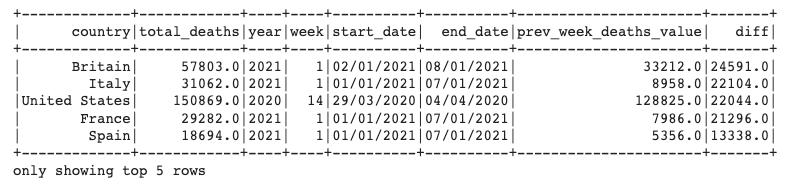

In [65]:
from pyspark.sql.functions import udf
from pyspark.sql.types import *
import pyspark.sql.functions as f
from pyspark.sql.functions import lag
import sys
from pyspark.sql.window import Window

In [54]:
!head -5 all_weekly_excess_deaths.csv

country;region;region_code;start_date;end_date;days;year;week;population;total_deaths;covid_deaths;expected_deaths;excess_deaths;non_covid_deaths;covid_deaths_per_100k;excess_deaths_per_100k;excess_deaths_pct_change
Australia;Australia;0;01.01.2020;07.01.2020;7;2020;1;25734100;2497 deaths;0;2463.11165730355;33.8883426964494;2497;0;0.131686527589655;0.0137583461131225
Australia;Australia;0;08.01.2020;14.01.2020;7;2020;2;25734100;2510 deaths;0;2458.27832397007;51.721676029927;2510;0;0.200984981133698;0.0210397966436924
Australia;Australia;0;15.01.2020;21.01.2020;7;2020;3;25734100;2501 deaths;0;2436.44499063674;64.5550093632601;2501;0;0.250853961721063;0.0264955743352897
Australia;Australia;0;22.01.2020;28.01.2020;7;2020;4;25734100;2597 deaths;0;2436.61165730341;160.388342696594;2597;0;0.623252193379967;0.065824335287838


In [196]:
df = spark.read.csv('all_weekly_excess_deaths.csv', sep=';', inferSchema=True, header=True)

In [197]:
df.show(3)

+---------+---------+-----------+----------+----------+----+----+----+----------+------------+------------+----------------+----------------+----------------+---------------------+----------------------+------------------------+
|  country|   region|region_code|start_date|  end_date|days|year|week|population|total_deaths|covid_deaths| expected_deaths|   excess_deaths|non_covid_deaths|covid_deaths_per_100k|excess_deaths_per_100k|excess_deaths_pct_change|
+---------+---------+-----------+----------+----------+----+----+----+----------+------------+------------+----------------+----------------+----------------+---------------------+----------------------+------------------------+
|Australia|Australia|          0|01.01.2020|07.01.2020|   7|2020|   1|  25734100| 2497 deaths|           0|2463.11165730355|33.8883426964494|          2497.0|                  0.0|     0.131686527589655|      0.0137583461131225|
|Australia|Australia|          0|08.01.2020|14.01.2020|   7|2020|   2|  25734100| 25

In [198]:
df2=df.select('country','total_deaths','year','week','start_date','end_date')

In [199]:
df2.show(3)

+---------+------------+----+----+----------+----------+
|  country|total_deaths|year|week|start_date|  end_date|
+---------+------------+----+----+----------+----------+
|Australia| 2497 deaths|2020|   1|01.01.2020|07.01.2020|
|Australia| 2510 deaths|2020|   2|08.01.2020|14.01.2020|
|Australia| 2501 deaths|2020|   3|15.01.2020|21.01.2020|
+---------+------------+----+----+----------+----------+
only showing top 3 rows



In [200]:
df3 = df2.withColumn("total_deaths", regexp_replace("total_deaths", "deaths", "").cast("int"))

In [201]:
windowSpec = (Window
              .partitionBy(f.col('country'))
              .orderBy(f.col('week').desc())
              )

In [202]:
df4=df3.withColumn('prev_week_deaths_value', lag('total_deaths',1).over(windowSpec))

In [203]:
df5 = df4.withColumn('diff', f.col('total_deaths')-f.col('prev_week_deaths_value'))

In [204]:
df5.show()

+---------+------------+----+----+----------+----------+----------------------+----+
|  country|total_deaths|year|week|start_date|  end_date|prev_week_deaths_value|diff|
+---------+------------+----+----+----------+----------+----------------------+----+
|Australia|        2552|2020|  53|30.12.2020|31.12.2020|                  NULL|NULL|
|Australia|        2624|2020|  52|23.12.2020|29.12.2020|                  2552|  72|
|Australia|        2610|2020|  51|16.12.2020|22.12.2020|                  2624| -14|
|Australia|        2609|2020|  50|09.12.2020|15.12.2020|                  2610|  -1|
|Australia|        2685|2020|  49|02.12.2020|08.12.2020|                  2609|  76|
|Australia|        2545|2020|  48|25.11.2020|01.12.2020|                  2685|-140|
|Australia|        2615|2020|  47|18.11.2020|24.11.2020|                  2545|  70|
|Australia|        2705|2020|  46|11.11.2020|17.11.2020|                  2615|  90|
|Australia|        2659|2020|  45|04.11.2020|10.11.2020|         

In [205]:
df_deaths_win= df5.orderBy([col('diff').desc()])
result = (df_deaths_win
          .dropDuplicates(["country"])
          .orderBy(desc("diff")).limit(5))
result.show()

+-------------+------------+----+----+----------+----------+----------------------+-----+
|      country|total_deaths|year|week|start_date|  end_date|prev_week_deaths_value| diff|
+-------------+------------+----+----+----------+----------+----------------------+-----+
|United States|       86388|2020|  53|27.12.2020|02.01.2021|                  4365|82023|
|       Mexico|       43652|2021|   3|18.01.2021|24.01.2021|                 16119|27533|
|      Britain|       24691|2020|  16|11.04.2020|17.04.2020|                   305|24386|
|        Italy|       22572|2020|  13|25.03.2020|31.03.2020|                   390|22182|
|        Spain|       19358|2020|  13|25.03.2020|31.03.2020|                   103|19255|
+-------------+------------+----+----+----------+----------+----------------------+-----+



## inny sposob rozwiazania zadania 2 Data frame

In [153]:
from pyspark.sql.functions import *
import sys
from pyspark.sql.window import Window
from pyspark.sql.functions import lag

In [154]:
deaths_zad2=spark.read.format('csv').option("header", True).option("delimiter", ";").load('all_weekly_excess_deaths.csv')

df_deaths = deaths_zad2.select("country", "total_deaths", 'year', 'week', 'start_date', 'end_date')


#Usuwanie zbędnych słów i rzutowanie na Int

df_deaths = df_deaths.withColumn("total_deaths", regexp_replace("total_deaths", "deaths", "").cast("int"))






df_deaths_win =  df_deaths.withColumn('prev_week_deaths_calue', lag('total_deaths',1).over(windowSpec))

df_deaths_win = df_deaths_win.withColumn('diff', f.col('total_deaths')-f.col('prev_week_deaths_calue'))

df_deaths_win=df_deaths_win .orderBy([col('diff').desc()])
result = (df_deaths_win
          .dropDuplicates(["country"])
          .orderBy(desc("diff")).limit(5))
result.show()

+-------------+------------+----+----+----------+----------+----------------------+-----+
|      country|total_deaths|year|week|start_date|  end_date|prev_week_deaths_calue| diff|
+-------------+------------+----+----+----------+----------+----------------------+-----+
|United States|       86388|2020|  53|27.12.2020|02.01.2021|                  4365|82023|
|       Mexico|       43652|2021|   3|18.01.2021|24.01.2021|                 16119|27533|
|      Britain|       24691|2020|  16|11.04.2020|17.04.2020|                   305|24386|
|        Italy|       22572|2020|  13|25.03.2020|31.03.2020|                   390|22182|
|        Spain|       19358|2020|  13|25.03.2020|31.03.2020|                   103|19255|
+-------------+------------+----+----+----------+----------+----------------------+-----+

